In [870]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defin ed by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
import matplotlib.pyplot as plt

In [871]:
from speedml import Speedml
sml = Speedml('house prediction data/train.csv', 
              'house prediction data/test.csv', 
              target = 'SalePrice',
              uid = 'Id')
sml.shape()

'train (1460, 80) | test (1459, 79)'

In [872]:
sml.configure('overfit_threshold',  sml.np.sqrt(sml.train.shape[0]) / sml.train.shape[0])
sml.configure('outpath',  "/")
sml.configure('high_cardinality',  30)

{'high_cardinality': 10,
 'outlier_threshold': 3,
 'outpath': 'output/',
 'overfit_threshold': 0.026171196129510684,
 'unique_ratio': 80}

{'high_cardinality': 10,
 'outlier_threshold': 3,
 'outpath': '/',
 'overfit_threshold': 0.026171196129510684,
 'unique_ratio': 80}

{'high_cardinality': 30,
 'outlier_threshold': 3,
 'outpath': '/',
 'overfit_threshold': 0.026171196129510684,
 'unique_ratio': 80}

In [873]:
eda_result_df = sml.eda()
eda_result_df

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Outliers Upper,"[LotArea, BsmtFinSF2, LowQualFinSF, BsmtHalfBa...",Positive skew (> 3). Use feature.outliers(upper).
Shape,"train (1460, 80) | test (1459, 79)",
Numerical Ratio,46%,Aim for 100% numerical.
Numerical High-cardinality,"[LotFrontage, LotArea, YearBuilt, YearRemodAdd...",(>30) categories. Use feature.density
Numerical Categorical,"[MSSubClass, OverallQual, OverallCond, LowQual...",Use plot.ordinal.
Text Categorical,"[RoofStyle, LotShape, SaleCondition, Foundatio...",Use feature.labels or feature.mapping.
Target Analysis (SalePrice),Pre-process.,Dimensionality reduction?


In [874]:
print(type(sml.train))
sml.train.head()

<class 'pandas.core.frame.DataFrame'>


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Deal with Outliers 

 Rules of thunmbs here:
 
* Check the relationship b.t. the target (SalePrice) the outlier feature from the eda result
* For a specific feature, if there are extreme values along that feature (far different from the most data on that feature axis), we can check if it could potentially provide information gain. If yes, keep it; otherwise drop it.
* Information gain here: not entropy kind of stuff, but very simple check: How those seemingly outliers correlates to the target feature (SalePrice) ? Or can they help to narrow down or restrain the SalePrice's range ? 

>show the outlier columns, types, and r value w.r.t the SalePrice

In [875]:
from scipy.stats import pearsonr 

In [876]:
outliers_col = eda_result_df['Results'][1]
before_ol_remove_df = pd.DataFrame ({
            'col name': outliers_col, 
            'type': [sml.train[col].dtype for col in outliers_col],
            'r-val': [pearsonr(sml.train[col], sml.train['SalePrice'])[0] for col in outliers_col]
        })
before_ol_remove_df

,col name,r-val,type
0,LotArea,0.263843,int64
1,BsmtFinSF2,-0.011378,int64
2,LowQualFinSF,-0.025606,int64
3,BsmtHalfBath,-0.016844,int64
4,KitchenAbvGr,-0.135907,int64
5,EnclosedPorch,-0.128578,int64
6,3SsnPorch,0.044584,int64
7,ScreenPorch,0.111447,int64
8,PoolArea,0.092404,int64
9,MiscVal,-0.021190,int64


In [877]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)

### check **LotArea**

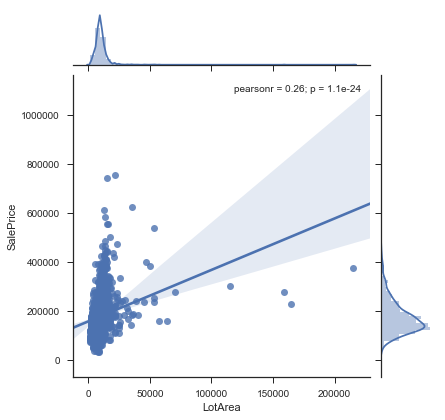

In [878]:
sns.jointplot(x='LotArea', y="SalePrice", data=sml.train, kind="reg") 

if we look into for LotArea's seemingly outliers, say where LotArea > 52000

check outlier precentage = 0.685 %


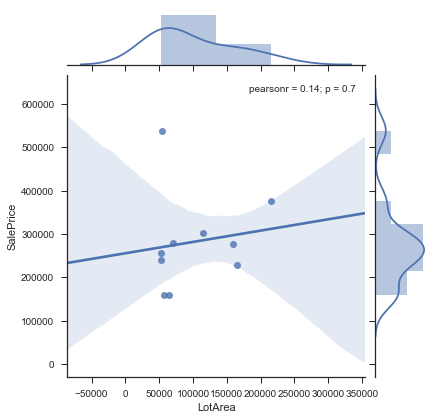

In [879]:
temp_df = sml.train[sml.train['LotArea'] > 52000]
print('check outlier precentage = {:.3f} %'.format(temp_df.shape[0]/sml.train.shape[0]*100.0))
sns.jointplot(x='LotArea', y="SalePrice", data=temp_df, kind="reg")


LotArea seems to be highly relative to the SalePrice, (r=.26)
and those seemingly outliers are also relative to the SalePrice. (r = .14),

So if we treat those as outliers, we might somehow hide the data from the training model and hurt the predictions.

In the LotArea feature, different values in different range just show different linear relationship (from the perspective of linear reg.) to the SalePrice values. Having far away values does not always make it true outlier.

conclusion: ** keep the LotArea**

### check **BsmtFinSF2**

since *BsmtFinSF2: Type 2 finished square feet*
> 0 basically just mean no information. So we should analyze without 0 here to have clear picture of how it affects the SalePrice

check precentage = 11.438 %


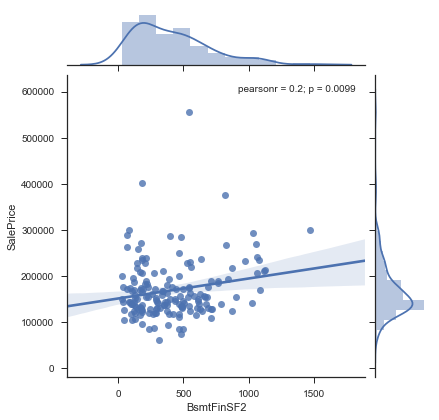

In [880]:
temp_df = sml.train[sml.train['BsmtFinSF2'] > 0]
print('check precentage = {:.3f} %'.format(temp_df.shape[0]/sml.train.shape[0]*100.0))
sns.jointplot(x='BsmtFinSF2', y="SalePrice", data=temp_df, kind="reg") 

BsmtFinSF2 without 0 now seems to be highly related to the SalePrice, (r=.2)

conclusion: ** keep the BsmtFinSF2**

### check **LowQualFinSF**

> same reason as BstmFinSF2, we have to focus on LowQualFinSF > 0

check precentage = 1.781 %


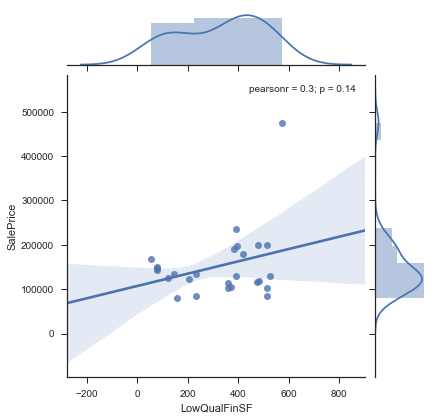

In [881]:
temp_df = sml.train[sml.train['LowQualFinSF'] > 0]
print('check precentage = {:.3f} %'.format(temp_df.shape[0]/sml.train.shape[0]*100.0))
sns.jointplot(x='LowQualFinSF', y="SalePrice", data=temp_df, kind="reg") 

LowQualFinSF without 0 now seems to be highly related to the SalePrice, (r=.3)
There is one outlier, which compose 1/1460 ~= 0.0685 % of the data => upper = 99.93

conclusion: ** keep the LowQualFinSF but remove one outlier (~upper = 99.93)**

### check **BsmtHalfBath**

check precentage = 100.000 %


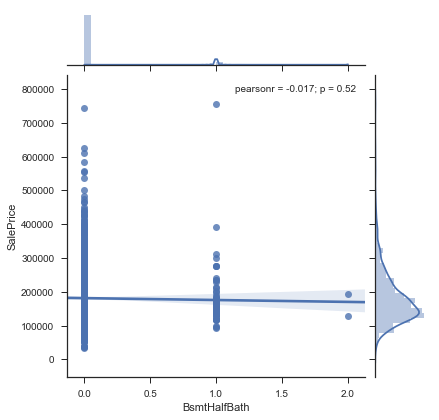

In [882]:
temp_df = sml.train[sml.train['BsmtHalfBath'] > -1]
print('check precentage = {:.3f} %'.format(temp_df.shape[0]/sml.train.shape[0]*100.0))
sns.jointplot(x='BsmtHalfBath', y="SalePrice", data=temp_df, kind="reg") 

BsmtHalfBath = 2 seems to restrain the range of SalePrice, which could be still informative. 

conclusion: ** keep the BsmtHalfBath**

### check **KitchenAbvGr**

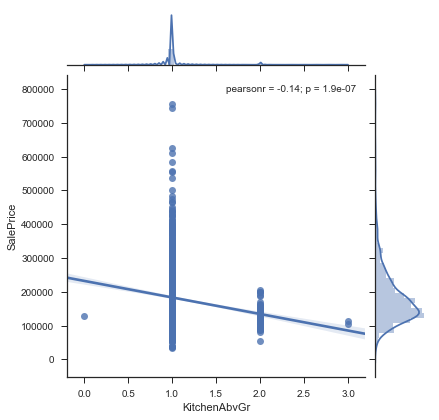

In [883]:
sns.jointplot(x='KitchenAbvGr', y="SalePrice", data=sml.train, kind="reg") 

same reason as BsmtHalfBath

conclusion: ** keep the KitchenAbvGr**

### check **EnclosedPorch**

> same reason as BstmFinSF2, we have to focus on EnclosedPorch > 0

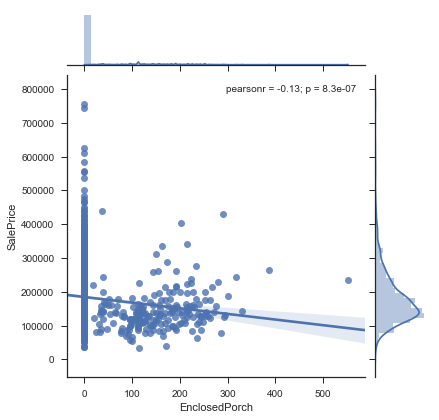

In [884]:
sns.jointplot(x='EnclosedPorch', y="SalePrice", data=sml.train, kind="reg") 

check precentage = 14.247 %


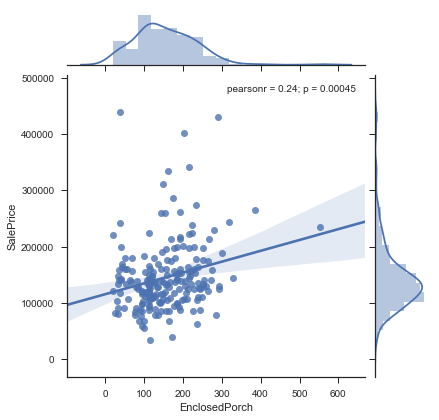

In [885]:
temp_df = sml.train[sml.train['EnclosedPorch'] > 0]
print('check precentage = {:.3f} %'.format(temp_df.shape[0]/sml.train.shape[0]*100.0))
sns.jointplot(x='EnclosedPorch', y="SalePrice", data=temp_df, kind="reg") 

Wow, the seemingly outlier almost follows the linear relationsip from the above.

conclusion: ** keep the EnclosedPorch**

### check **3SsnPorch**

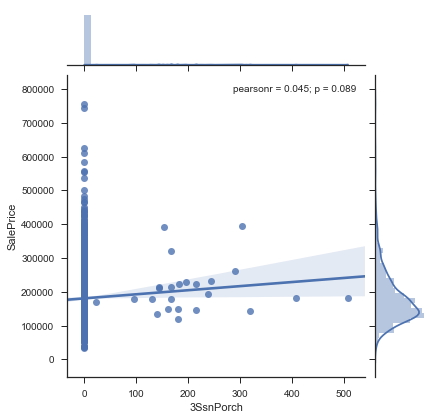

In [886]:
sns.jointplot(x='3SsnPorch', y="SalePrice", data=sml.train, kind="reg") 

focus on 3SsnPorch > 200

check precentage = 0.616 %


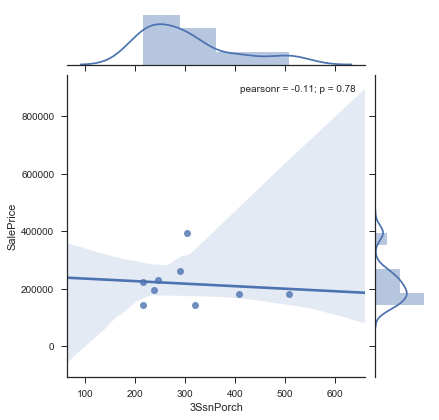

In [887]:
temp_df = sml.train[sml.train['3SsnPorch'] > 200]
print('check precentage = {:.3f} %'.format(temp_df.shape[0]/sml.train.shape[0]*100.0))
sns.jointplot(x='3SsnPorch', y="SalePrice", data=temp_df, kind="reg") 

it seems that having too much 3SsnPorch area have a slightly negative effect on the SalePrice, hmm...

The outlier almost follows the linear relationsip from the above.

conclusion: ** keep the 3SsnPorch**

### check **ScreenPorch**

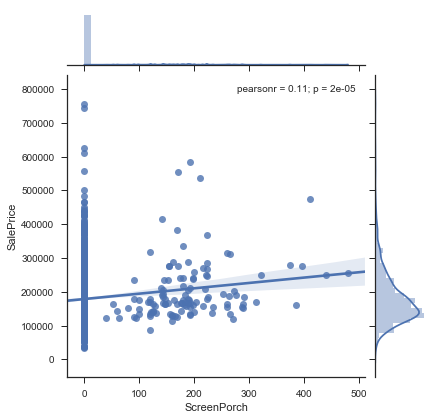

In [888]:
sns.jointplot(x='ScreenPorch', y="SalePrice", data=sml.train, kind="reg") 

ok, nice then. seemingly outliers follow the positive relationship

conclusion: ** keep the 3SsnPorch**

### check **PoolArea**

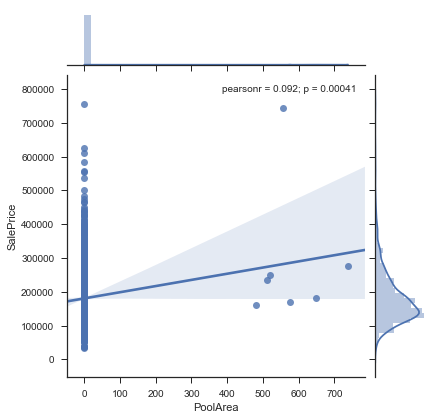

In [889]:
sns.jointplot(x='PoolArea', y="SalePrice", data=sml.train, kind="reg") 

focus on PoolArea > 400

check precentage = 0.479 %


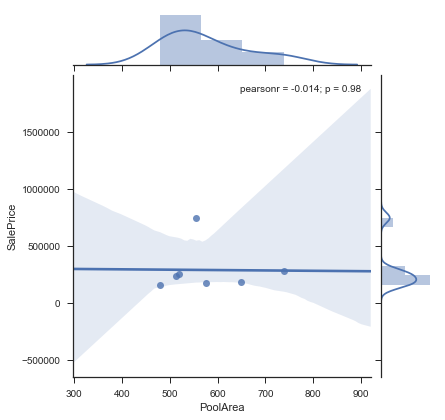

In [890]:
temp_df = sml.train[sml.train['PoolArea'] > 400]
print('check precentage = {:.3f} %'.format(temp_df.shape[0]/sml.train.shape[0]*100.0))
sns.jointplot(x='PoolArea', y="SalePrice", data=temp_df, kind="reg") 

the seemingly outliers seems to restrain the SalePrice to around 25000, if there are pools!

conclusion: ** keep the PoolArea**

### check **MiscVal**

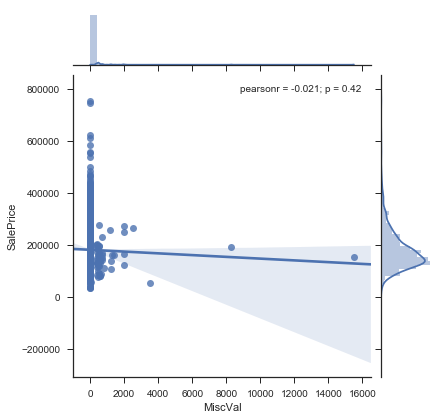

In [891]:
sns.jointplot(x='MiscVal', y="SalePrice", data=sml.train, kind="reg") 

ok, nice then. seemingly outliers follow the slightly negative relationship

conclusion: ** keep the MisVal**

Observe from the distribution above, we can assume whether there might be outliers or not

* LotArea: Lot size in square feet
* BsmtFinSF2: Type 2 finished square feet 
* LowQualFinSF: Low quality finished square feet (all floors)  
* BsmtHalfBath: Basement half bathrooms 
* KitchenAbvGr: Total rooms above grade (does not include bathrooms) 
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* MiscVal: $Value of miscellaneous feature

this function removes the outliers (upper) and draw the continuous plot before and after the removal


In [892]:
def plot_outliers(outlier_dict):
    for col in outlier_dict:
        sml.plot.continuous(col)
        sml.feature.outliers(col, upper=outlier_dict[col])
        sml.plot.continuous(col)

"\noutlier_dict = {\n    'LotArea'       :  99.5,\n    'BsmtFinSF2'    :  99 ,   \n    'LowQualFinSF'  :  99.93,\n    'BsmtHalfBath'  :  99,\n    'KitchenAbvGr'  :  99,\n    'EnclosedPorch' :  99,\n    '3SsnPorch'     :  99,\n    'ScreenPorch'   :  99,\n    'PoolArea'      :  99,\n    'MiscVal'       :  99,\n}\n"

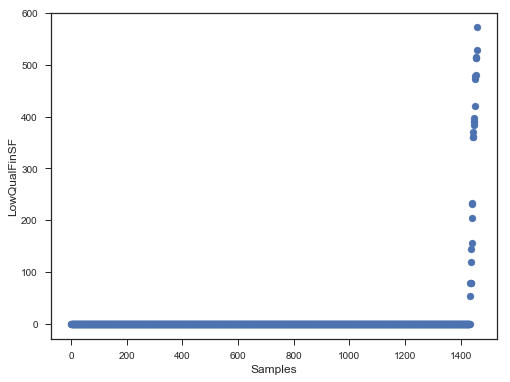

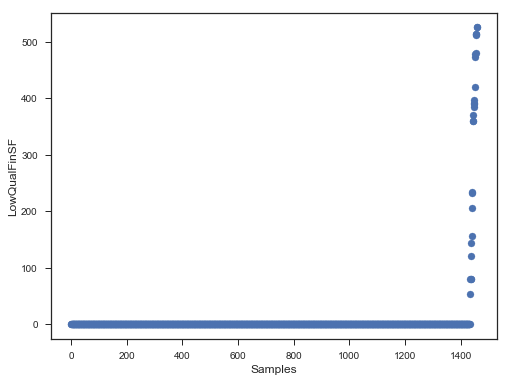

In [893]:

outlier_dict = {
    'LowQualFinSF'  :  99.92,
}
'''
outlier_dict = {
    'LotArea'       :  99.5,
    'BsmtFinSF2'    :  99 ,   
    'LowQualFinSF'  :  99.93,
    'BsmtHalfBath'  :  99,
    'KitchenAbvGr'  :  99,
    'EnclosedPorch' :  99,
    '3SsnPorch'     :  99,
    'ScreenPorch'   :  99,
    'PoolArea'      :  99,
    'MiscVal'       :  99,
}
'''

plot_outliers(outlier_dict)


### according to the post: https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset  GrLivArea > 4000 should be removed

In [894]:
# copy the train\test data
train = sml.train
test = sml.test

train = train[train.GrLivArea < 4000]

# Feature Engineering

In [895]:
eda_result_df = sml.eda()
eda_result_df

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Outliers Upper,"[LotArea, BsmtFinSF2, LowQualFinSF, BsmtHalfBa...",Positive skew (> 3). Use feature.outliers(upper).
Shape,"train (1460, 80) | test (1459, 79)",
Numerical Ratio,46%,Aim for 100% numerical.
Numerical High-cardinality,"[LotFrontage, LotArea, YearBuilt, YearRemodAdd...",(>30) categories. Use feature.density
Numerical Categorical,"[MSSubClass, OverallQual, OverallCond, LowQual...",Use plot.ordinal.
Text Categorical,"[RoofStyle, LotShape, SaleCondition, Foundatio...",Use feature.labels or feature.mapping.
Target Analysis (SalePrice),Pre-process.,Dimensionality reduction?


In [896]:
all_df = pd.concat([train, test])
all_df.shape

(2915, 80)

In [897]:
optional_cols = ['Condition2', 'Exterior2nd', 'BsmtFinType2', 'BsmtFinSF2']

In [898]:
na_means_not_exist_cols = [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinSF1',
    'BsmtFinType2',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FireplaceQu',
    'GarageType',
    'Fireplaces',
    'FireplaceQu',
    'GarageType',
    'GarageYrBlt',
    'GarageFinish',
    'GarageCars',
    'GarageArea',
    'GarageQual',
    'GarageCond',
    'PoolArea',
    'PoolQC',
    'Fence',
    'MiscFeature'
]

## Numerical Types

In [899]:
cat_num_col = eda_result_df['Results'][5]
print(all_df[cat_num_col].isnull().sum())

MSSubClass      0
OverallQual     0
OverallCond     0
LowQualFinSF    0
BsmtFullBath    2
BsmtHalfBath    2
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      1
3SsnPorch       0
PoolArea        0
MiscVal         0
MoSold          0
YrSold          0
dtype: int64


> ## Categorical: Deal with empty values

> if there is a col in optional cols, we should check if there is type standing for none, or give it a new type (since it's opional, it is unreasonable to give it a mean\median value

In [900]:
from collections import Counter

for col in cat_num_col:
    null_count = all_df[col].isnull().sum()
    
    if null_count != 0:
        print('Total null counts for feature {}: {}'.format(col, null_count))
       
        #new_col[new_col.isnull()] = new_value
        
        if col in optional_cols:
            print('Col: ', col, ' is in optional cols!')
        else:
            if col in na_means_not_exist_cols:
                val = 0
            else:
                val = Counter(all_df[col]).most_common(1)[0][0]
            
            print('Most common value used to replace', int(val))

            all_df[col][all_df[col].isnull()] = val
            print('New Null Count: ', all_df[col].isnull().sum())
            print('')
        

Total null counts for feature BsmtFullBath: 2
Most common value used to replace

C:\Users\khyeh\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


 0
New Null Count:  0

Total null counts for feature BsmtHalfBath: 2
Most common value used to replace 0
New Null Count:  0

Total null counts for feature GarageCars: 1
Most common value used to replace 0
New Null Count:  0



> ## High cardinality num: Deal with empty values, and do some value transform if needed

* All empty values are then replaced with the mean (except col in optional col should be filled with 0 (stands for none))
* if the scale range too big, I'll take a log scale on it

In [901]:
high_card_num_col = eda_result_df['Results'][4]
high_card_num_col.remove('SalePrice')
print(all_df[high_card_num_col].isnull().sum())

LotFrontage      486
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
GarageYrBlt      159
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
ScreenPorch        0
dtype: int64


we assume the test data and the train data should be comes from the same distribution, hence, the mean\var are calculated based on training data set.

In [902]:
for col in high_card_num_col:
    null_count = all_df[col].isnull().sum()
    if null_count != 0:
        print('Total null counts for feature {}: {}'.format(col, null_count))

        if col in optional_cols:
            print('Col: ', col, ' is in optional cols => filled with 0.0')
            all_df[col][all_df[col].isnull()] = 0.0
        else:
            if col in na_means_not_exist_cols:
                val = 0.0
            else:
                val = all_df[col].mean()
            print('Mean used to replace', val)

            all_df[col][all_df[col].isnull()] = val
        
        print('New Null Count: ', all_df[col].isnull().sum())
        print('')

Total null counts for feature LotFrontage: 486


C:\Users\khyeh\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Mean used to replace 69.12885961300947
New Null Count:  0

Total null counts for feature MasVnrArea: 23
Mean used to replace 101.399377593361
New Null Count:  0

C:\Users\khyeh\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy




Total null counts for feature BsmtFinSF1: 1
Mean used to replace 0.0
New Null Count:  0

Total null counts for feature BsmtFinSF2: 1
Col:  BsmtFinSF2  is in optional cols => filled with 0.0
New Null Count:  0

Total null counts for feature BsmtUnfSF: 1
Mean used to replace 0.0
New Null Count:  0

Total null counts for feature TotalBsmtSF: 1
Mean used to replace 0.0
New Null Count:  0

Total null counts for feature GarageYrBlt: 159
Mean used to replace 0.0
New Null Count:  0

Total null counts for feature GarageArea: 1
Mean used to replace 0.0
New Null Count:  0



> need to check whether some attributes would be better to transform into log scale

In [903]:
# Generate command for myself to paste
for col in high_card_num_col:
    print("sns.distplot(all_df[\'{}\'])".format(col))

sns.distplot(all_df['LotFrontage'])
sns.distplot(all_df['LotArea'])
sns.distplot(all_df['YearBuilt'])
sns.distplot(all_df['YearRemodAdd'])
sns.distplot(all_df['MasVnrArea'])
sns.distplot(all_df['BsmtFinSF1'])
sns.distplot(all_df['BsmtFinSF2'])
sns.distplot(all_df['BsmtUnfSF'])
sns.distplot(all_df['TotalBsmtSF'])
sns.distplot(all_df['1stFlrSF'])
sns.distplot(all_df['2ndFlrSF'])
sns.distplot(all_df['GrLivArea'])
sns.distplot(all_df['GarageYrBlt'])
sns.distplot(all_df['GarageArea'])
sns.distplot(all_df['WoodDeckSF'])
sns.distplot(all_df['OpenPorchSF'])
sns.distplot(all_df['EnclosedPorch'])
sns.distplot(all_df['ScreenPorch'])


In [904]:
def cast_to_log_scale(col_data):
    new_col = []
    for i, v in enumerate(col_data):
        if v != 0:
            new_col.append(np.log(col_data[i]))
        else:
            new_col.append(0)
    return np.array(new_col)

In [905]:
def cast_col_to_log_scale(col):
    all_df[col] = cast_to_log_scale(np.array(all_df[col]))
    sns.distplot(all_df[col])

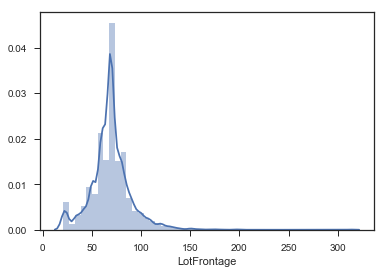

In [906]:
sns.distplot(all_df['LotFrontage'])

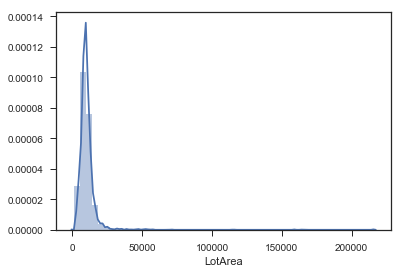

In [907]:
sns.distplot(all_df['LotArea'])

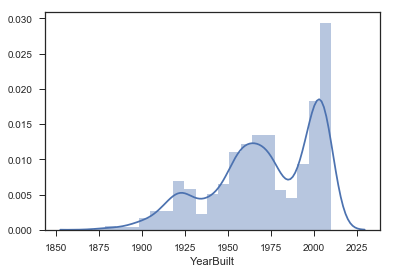

In [908]:
sns.distplot(all_df['YearBuilt'])

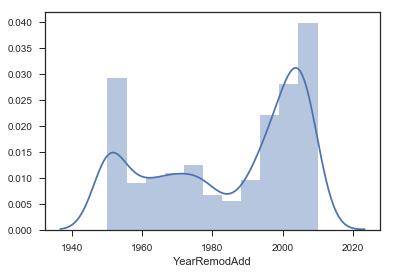

In [909]:
sns.distplot(all_df['YearRemodAdd'])

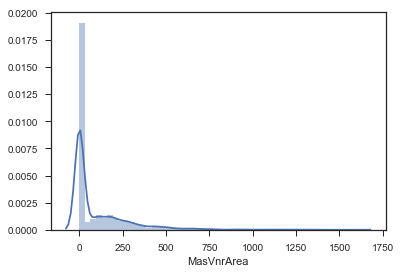

In [910]:
sns.distplot(all_df['MasVnrArea'])

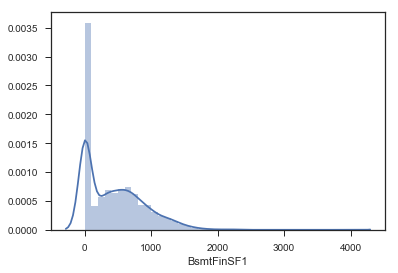

In [911]:
sns.distplot(all_df['BsmtFinSF1'])

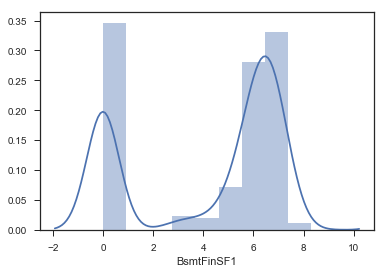

In [912]:
cast_col_to_log_scale('BsmtFinSF1')

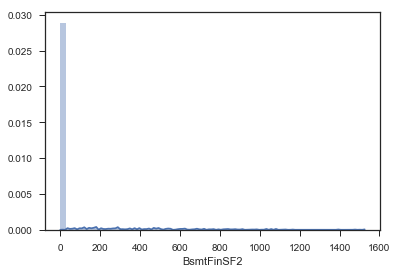

In [913]:
sns.distplot(all_df['BsmtFinSF2'])

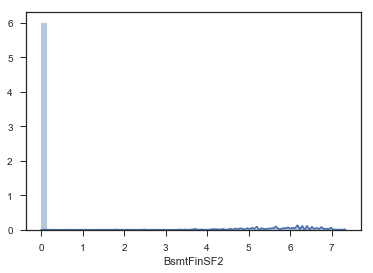

In [914]:
cast_col_to_log_scale('BsmtFinSF2')

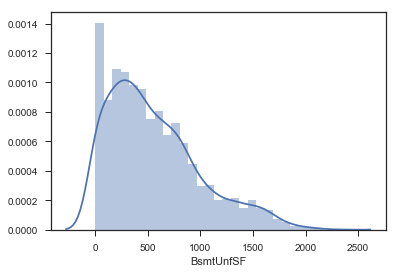

In [915]:
sns.distplot(all_df['BsmtUnfSF'])

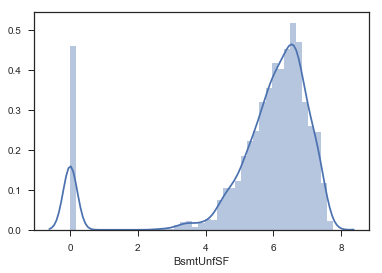

In [916]:
cast_col_to_log_scale('BsmtUnfSF')

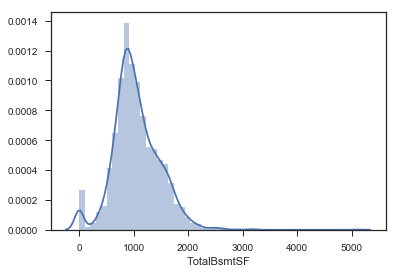

In [917]:
sns.distplot(all_df['TotalBsmtSF'])

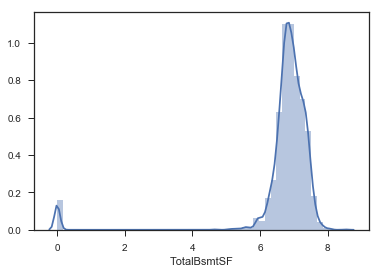

In [918]:
cast_col_to_log_scale('TotalBsmtSF')

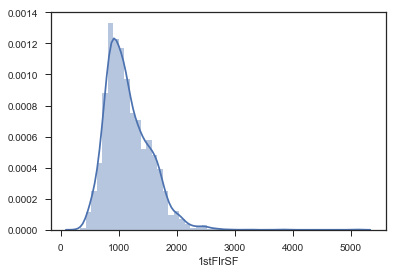

In [919]:
sns.distplot(all_df['1stFlrSF'])

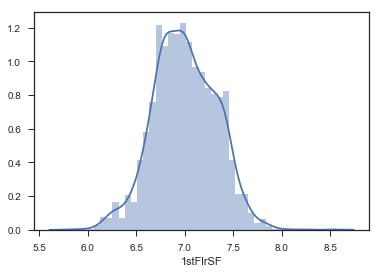

In [920]:
cast_col_to_log_scale('1stFlrSF')

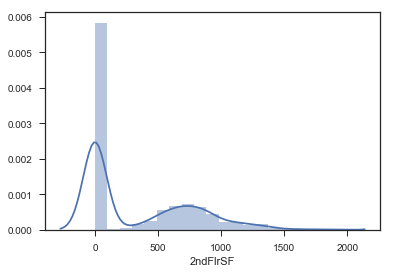

In [921]:
sns.distplot(all_df['2ndFlrSF'])

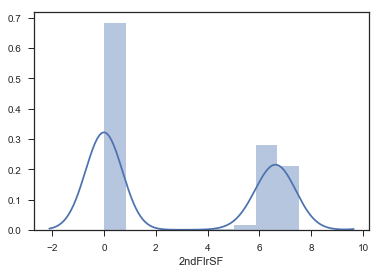

In [922]:
cast_col_to_log_scale('2ndFlrSF')

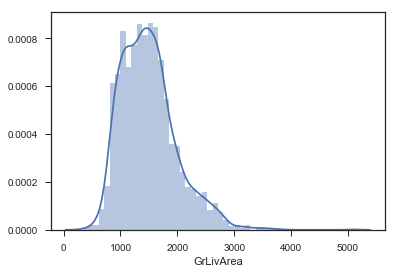

In [923]:
sns.distplot(all_df['GrLivArea'])

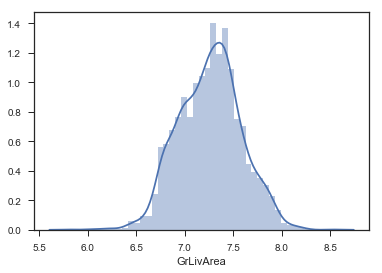

In [924]:
cast_col_to_log_scale('GrLivArea')

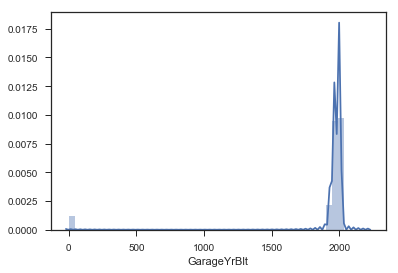

In [925]:
sns.distplot(all_df['GarageYrBlt'])

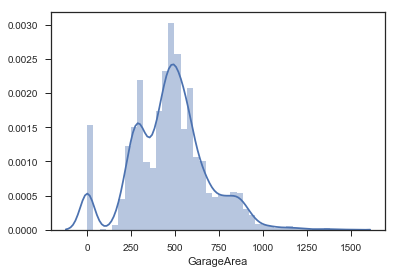

In [926]:
sns.distplot(all_df['GarageArea'])

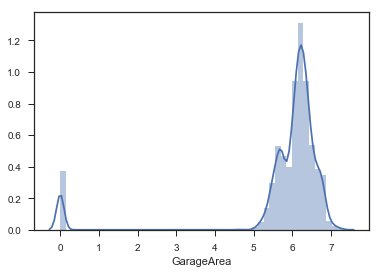

In [927]:
cast_col_to_log_scale('GarageArea')

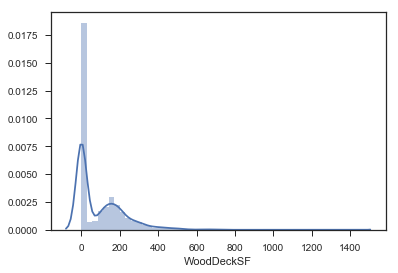

In [928]:
sns.distplot(all_df['WoodDeckSF'])

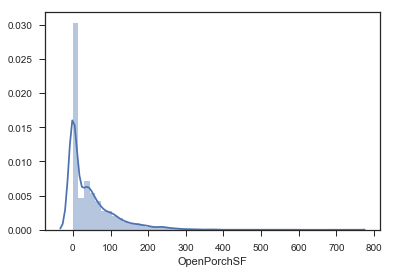

In [929]:
sns.distplot(all_df['OpenPorchSF'])

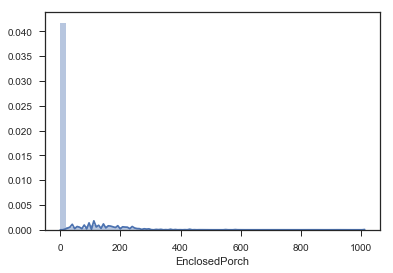

In [930]:
sns.distplot(all_df['EnclosedPorch'])

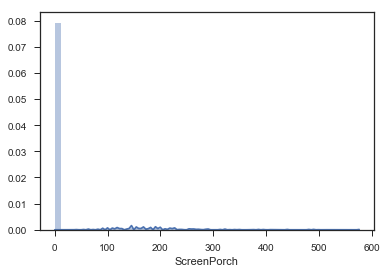

In [931]:
sns.distplot(all_df['ScreenPorch'])

> check again if any number becomes NaN


In [932]:
from sklearn.preprocessing import StandardScaler
stdSc = StandardScaler()
#all_df[high_card_num_col] = stdSc.fit_transform(all_df[high_card_num_col])

In [933]:
print(all_df[high_card_num_col].isnull().sum())

LotFrontage      0
LotArea          0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
GarageYrBlt      0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
dtype: int64


> (Optional) create density features for all numerical cols with high card. num.

In [934]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 25

## Category text 

In [935]:
text_cat_col = eda_result_df['Results'][6]
print(all_df[text_cat_col].isnull().sum())

RoofStyle           0
LotShape            0
SaleCondition       0
Foundation          0
LandContour         0
BldgType            0
ExterQual           0
GarageQual        159
GarageType        157
KitchenQual         1
BsmtFinType1       79
FireplaceQu      1420
                 ... 
LotConfig           0
RoofMatl            0
BsmtFinType2       80
ExterCond           0
Neighborhood        0
Street              0
LandSlope           0
MSZoning            4
HeatingQC           0
PoolQC           2907
Condition1          0
Heating             0
Length: 43, dtype: int64


> Deal with reset of cat. text, missing values

In [936]:
import math
for col in text_cat_col:
    null_count = all_df[col].isnull().sum()
    if null_count != 0:
        print('Total null counts for feature {}: {}'.format(col, null_count))

        if col in optional_cols:
            print('Col: ', col, ' is in optional cols => filled with \'None\'')
            all_df[col][all_df[col].isnull()] = 'None'
        else:
            if col in na_means_not_exist_cols:
                val = 'No'
            else:
                val = Counter(all_df[col]).most_common(1)[0][0]
            #if not isinstance(val, str) and math.isnan(val):
            #    val = 'None'
            print('Most common value used to replace', val)

            all_df[col][all_df[col].isnull()] = val
        
        print('New Null Count: ', all_df[col].isnull().sum())
        print('')

Total null counts for feature GarageQual: 159

C:\Users\khyeh\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Most common value used to replace No
New Null Count:  0

Total null counts for feature GarageType: 157
Most common value used to replace No
New Null Count:  0

Total null counts for feature KitchenQual: 1
Most common value used to replace TA
New Null Count:  0

Total null counts for feature BsmtFinType1: 79
Most common value used to replace No
New Null Count:  0

Total null counts for feature FireplaceQu: 1420
Most common value used to replace No
New Null Count:  0

Total null counts for feature GarageCond: 159
Most common value used to replace No
New Null Count:  0

Total null counts for feature MiscFeature: 2810
Most common value used to replace No
New Null Count:  0

Total null counts for feature Functional: 2
Most common value used to replace Typ
New Null Count:  0

Total null counts for feature BsmtExposure: 82
Most common value used to replace No
New Null Count:  0

Total null counts for feature BsmtCond: 82
Most common value used to replace No
New Null Count:  0

Total null cou

C:\Users\khyeh\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


> convert text with category type into numerical labels

In [937]:
print(all_df[text_cat_col])
for col in text_cat_col:
    all_df[col] = all_df[col].astype('category').cat.codes
    
print(all_df[text_cat_col])

     RoofStyle LotShape SaleCondition Foundation LandContour BldgType  \
0        Gable      Reg        Normal      PConc         Lvl     1Fam   
1        Gable      Reg        Normal     CBlock         Lvl     1Fam   
2        Gable      IR1        Normal      PConc         Lvl     1Fam   
3        Gable      IR1       Abnorml     BrkTil         Lvl     1Fam   
4        Gable      IR1        Normal      PConc         Lvl     1Fam   
5        Gable      IR1        Normal       Wood         Lvl     1Fam   
6        Gable      Reg        Normal      PConc         Lvl     1Fam   
7        Gable      IR1        Normal     CBlock         Lvl     1Fam   
8        Gable      Reg       Abnorml     BrkTil         Lvl     1Fam   
9        Gable      Reg        Normal     BrkTil         Lvl   2fmCon   
10         Hip      Reg        Normal     CBlock         Lvl     1Fam   
11         Hip      IR1       Partial      PConc         Lvl     1Fam   
...        ...      ...           ...        ...   

In [938]:
print(train.shape)

(1456, 80)


In [939]:
print(test.shape)

(1459, 79)


In [940]:
train = all_df.iloc[:1456]
test = all_df.iloc[1456:]

print(train.shape)
print(test.shape)

(1456, 80)
(1459, 80)


## since we used log scale of 'SalePrice' to calculate the MSE, we should transform that column to log scale in training

C:\Users\khyeh\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


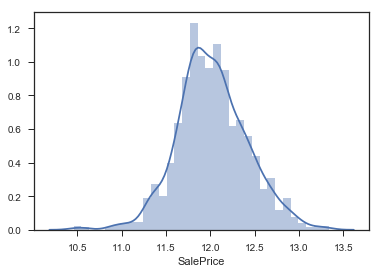

In [941]:
train['SalePrice'] = cast_to_log_scale(np.array(train['SalePrice']))
sns.distplot(train['SalePrice'])

In [942]:
train.to_csv("house prediction data/train_cleaned.csv", encoding='utf-8', index=False)
test.to_csv("house prediction data/test_cleaned.csv", encoding='utf-8', index=False)

In [943]:
sml = Speedml('house prediction data/train_cleaned.csv', 
              'house prediction data/test_cleaned.csv', 
              target = 'SalePrice')

In [944]:
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Outliers Upper,"[3SsnPorch, BsmtHalfBath, Condition1, Conditio...",Positive skew (> 3). Use feature.outliers(upper).
Outliers Lower,"[BsmtFinType2, CentralAir, Electrical, Functio...",Negative skew (< -3). Use feature.outliers(low...
Shape,"train (1456, 80) | test (1459, 80)",
Numerical High-cardinality,"[1stFlrSF, 2ndFlrSF, 3SsnPorch, BsmtFinSF1, Bs...",(>10) categories. Use feature.density
Numerical Categorical,"[Alley, BedroomAbvGr, BldgType, BsmtCond, Bsmt...",Use plot.ordinal.
Target Analysis (SalePrice),Pre-process.,Dimensionality reduction?
